In [1]:
import geopandas as gpd
import mplleaflet
import shapely
import pandas as pd
import numpy as np
import seaborn as sns
import pysal as ps
from rasterstats import zonal_stats
import rasterio
import googlemaps
import re


In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/AnthonyAbercrombie/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
with open('../data/KoeppenGeiger.UScounty.txt','rt') as f:
    climate_regions_raw = f.read()
    f.close()

In [3]:
# climate_regions_raw[:100]
rows = climate_regions_raw.split('\n')
climate_regions_table = [r.split('\t') for r in rows]

In [4]:
# climate_regions_table[:10]
columns = climate_regions_table[0]
data = climate_regions_table[1:]

climate_regions_df = pd.DataFrame(data, columns=columns)

In [5]:
climate_regions_df.head()

,STATE,COUNTY,FIPS,CLS,PROP
0,Alabama,Autauga,01001,Cfa,1.000
1,Alabama,Baldwin,01003,Cfa,1.000
2,Alabama,Barbour,01005,Cfa,1.000
3,Alabama,Bibb,01007,Cfa,1.000
4,Alabama,Blount,01009,Cfa,1.000


In [6]:
climate_soiling = pd.read_csv('../data/climate_soiling.csv')
climate_soiling['CLS'] = climate_soiling['NorthAm Climate Classes']
climate_soiling.head()

,NorthAm Climate Classes,Max daily SLF decrease,CLS
0,BWk,0.06%,BWk
1,Cfa,0.08%,Cfa
2,NaN,0.08%,NaN
3,BSk,0.06%,BSk
4,Dfa,0.08%,Dfa


In [7]:
climate_regions_soiling = pd.merge(climate_regions_df,climate_soiling,on='CLS',how='left')

In [10]:
climate_regions_soiling.head()

,STATE,COUNTY,FIPS,CLS,PROP,NorthAm Climate Classes,Max daily SLF decrease
0,Alabama,Autauga,01001,Cfa,1.000,Cfa,0.08%
1,Alabama,Baldwin,01003,Cfa,1.000,Cfa,0.08%
2,Alabama,Barbour,01005,Cfa,1.000,Cfa,0.08%
3,Alabama,Bibb,01007,Cfa,1.000,Cfa,0.08%
4,Alabama,Blount,01009,Cfa,1.000,Cfa,0.08%


# Counties

In [8]:
counties = gpd.read_file('../data/cb_2016_us_county_5m/cb_2016_us_county_5m.shp')

In [14]:
counties.shape

(3233, 11)

In [11]:
counties['COUNTY'] = counties['NAME']
counties.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry,COUNTY
0,0500000US04015,34475567011,387344307,015,00025445,04015,06,Mohave,04,"POLYGON ((-114.755618 36.087166, -114.753638 3...",Mohave
1,0500000US12035,1257365642,221047161,035,00308547,12035,06,Flagler,12,"POLYGON ((-81.52365999999999 29.622432, -81.32...",Flagler
2,0500000US20129,1889993251,507796,129,00485135,20129,06,Morton,20,"POLYGON ((-102.041952 37.024742, -102.04195 37...",Morton
3,0500000US28093,1828989833,9195190,093,00695770,28093,06,Marshall,28,"POLYGON ((-89.7243244282036 34.9952117286505, ...",Marshall
4,0500000US29510,160458044,10670040,510,00767557,29510,25,St. Louis,29,"POLYGON ((-90.318212 38.600017, -90.301828 38....",St. Louis


In [12]:
counties_regions_soiling = pd.merge(counties,climate_regions_soiling,on='COUNTY', how='left')

In [13]:
counties_regions_soiling.shape

(18242, 17)

In [16]:
counties_regions_soiling.tail()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry,COUNTY,STATE,FIPS,CLS,PROP,NorthAm Climate Classes,Max daily SLF decrease
18237,0500000US48495,2178481652,414369,495,01384033,48495,06,Winkler,48,"POLYGON ((-103.326501 32.00037, -103.278521 32...",Winkler,Texas,48495,BSk,0.115,BSk,0.06%
18238,0500000US48495,2178481652,414369,495,01384033,48495,06,Winkler,48,"POLYGON ((-103.326501 32.00037, -103.278521 32...",Winkler,Texas,48495,BWh,0.885,BWh,0.06%
18239,0500000US08109,8206547711,4454510,109,00198170,08109,06,Saguache,08,"POLYGON ((-107.001119 38.147072, -107.000601 3...",Saguache,Colorado,08109,Dfc,0.569,Dfc,0.10%
18240,0500000US08109,8206547711,4454510,109,00198170,08109,06,Saguache,08,"POLYGON ((-107.001119 38.147072, -107.000601 3...",Saguache,Colorado,08109,BSk,0.269,BSk,0.06%
18241,0500000US08109,8206547711,4454510,109,00198170,08109,06,Saguache,08,"POLYGON ((-107.001119 38.147072, -107.000601 3...",Saguache,Colorado,08109,Dfb,0.162,Dfb,0.10%


In [24]:
counties_regions_soiling_no_dupl = counties_regions_soiling.drop_duplicates('GEOID')

In [25]:
counties_regions_soiling_no_dupl.shape

(3233, 17)

In [26]:
counties_regions_soiling_no_dupl.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry,COUNTY,STATE,FIPS,CLS,PROP,NorthAm Climate Classes,Max daily SLF decrease
0,0500000US04015,34475567011,387344307,015,00025445,04015,06,Mohave,04,"POLYGON ((-114.755618 36.087166, -114.753638 3...",Mohave,Arizona,04015,BWk,0.182,BWk,0.06%
4,0500000US12035,1257365642,221047161,035,00308547,12035,06,Flagler,12,"POLYGON ((-81.52365999999999 29.622432, -81.32...",Flagler,Florida,12035,Cfa,1.000,Cfa,0.08%
5,0500000US20129,1889993251,507796,129,00485135,20129,06,Morton,20,"POLYGON ((-102.041952 37.024742, -102.04195 37...",Morton,Kansas,20129,BSk,1.000,BSk,0.06%
7,0500000US28093,1828989833,9195190,093,00695770,28093,06,Marshall,28,"POLYGON ((-89.7243244282036 34.9952117286505, ...",Marshall,Alabama,01095,Cfa,1.000,Cfa,0.08%
19,0500000US29510,160458044,10670040,510,00767557,29510,25,St. Louis,29,"POLYGON ((-90.318212 38.600017, -90.301828 38....",St. Louis,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
def pct_to_number(row):
    slf_str = str(row)
    slf_fl = float(slf_str.strip('%'))
    return slf_fl

In [36]:
counties_regions_soiling_no_dupl['MAX_DAILY_SLF_DECREASE'] = counties_regions_soiling['Max daily SLF decrease'].apply(lambda x: pct_to_number(x))

/Users/AnthonyAbercrombie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
counties_regions_soiling_no_dupl.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry,COUNTY,STATE,FIPS,CLS,PROP,NorthAm Climate Classes,Max daily SLF decrease,MAX_DAILY_SLF_DECREASE
0,0500000US04015,34475567011,387344307,015,00025445,04015,06,Mohave,04,"POLYGON ((-114.755618 36.087166, -114.753638 3...",Mohave,Arizona,04015,BWk,0.182,BWk,0.06%,0.06
4,0500000US12035,1257365642,221047161,035,00308547,12035,06,Flagler,12,"POLYGON ((-81.52365999999999 29.622432, -81.32...",Flagler,Florida,12035,Cfa,1.000,Cfa,0.08%,0.08
5,0500000US20129,1889993251,507796,129,00485135,20129,06,Morton,20,"POLYGON ((-102.041952 37.024742, -102.04195 37...",Morton,Kansas,20129,BSk,1.000,BSk,0.06%,0.06
7,0500000US28093,1828989833,9195190,093,00695770,28093,06,Marshall,28,"POLYGON ((-89.7243244282036 34.9952117286505, ...",Marshall,Alabama,01095,Cfa,1.000,Cfa,0.08%,0.08
19,0500000US29510,160458044,10670040,510,00767557,29510,25,St. Louis,29,"POLYGON ((-90.318212 38.600017, -90.301828 38....",St. Louis,NaN,NaN,NaN,NaN,NaN,NaN,NaN


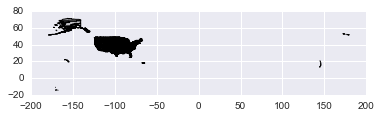

In [27]:
counties_regions_soiling_no_dupl.plot()

In [39]:
with open('counties_regions_soiling.geojson', 'wt') as f:
    f.write(counties_regions_soiling_no_dupl.to_json())
    f.close()


In [29]:
!ls

counties_pv.geojson                zipcode_climate_county.geojson
counties_regions_soiling.geojson   zipcode_climate_county_pt1.geojson
county_pv.p                        zipcode_climate_county_pt2.geojson
geospatial_analysis.ipynb          zipcode_climate_county_pt3.geojson
soiling_climate_regions.ipynb      zipcode_climate_county_pt4.geojson
zip_pv.geojson                     zipcode_climate_county_pt5.geojson
zip_pv.p                           zipcode_pv.geojson
zipcode_climate_county.gejson
